<a href="https://colab.research.google.com/github/banolu/Python_Homework/blob/main/Tarea_6_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selected features: ['INDUS', 'AGE', 'NOX', 'RAD', 'LSTAT', 'DIS', 'MEDV', 'TAX']

New dataframe with selected features:
   INDUS   AGE    NOX  RAD  LSTAT     DIS  MEDV    TAX
0   2.31  65.2  0.538    1   4.98  4.0900  24.0  296.0
1   7.07  78.9  0.469    2   9.14  4.9671  21.6  242.0
2   7.07  61.1  0.469    2   4.03  4.9671  34.7  242.0
3   2.18  45.8  0.458    3   2.94  6.0622  33.4  222.0
4   2.18  54.2  0.458    3   5.33  6.0622  36.2  222.0
Selected features: ['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT']


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Selected features: ['CRIM', 'RM', 'LSTAT']


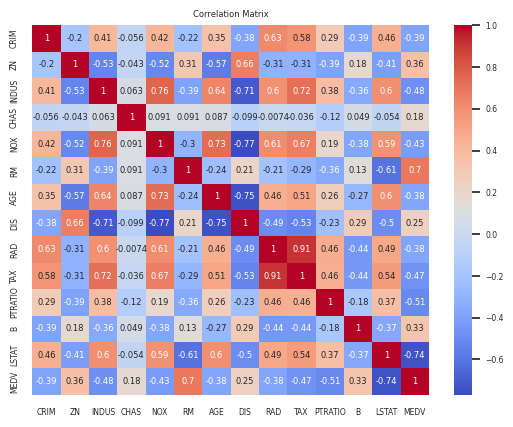

In [20]:
########################################################################################
## Selección de características basada en la correlación                                 
##...(Correlation-based feature selection)
########################################################################################

# Correlación basada en selección de características es un método de filtro 
#para la selección de características que evalúa la correlación entre cada 
#característica y la variable objetivo, así como la correlación entre pares de
#características. Este método es útil cuando queremos identificar las 
#características que están más fuertemente correlacionadas con la variable 
#objetivo y aquellas que son redundantes entre sí.
#


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing = pd.read_csv(url, sep='\s+', header=None)
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                   'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Compute the correlation matrix
corr = housing.corr()

# Plot the correlation matrix

sns.set(font_scale=.5)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Perform feature selection based on correlation
threshold = 0.5
corr_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            corr_features.add(corr.columns[i])

print('Selected features:', list(corr_features))

# Create a new dataframe with the selected features
selected_features_df = housing[list(corr_features)]

# Display the new dataframe
print('\nNew dataframe with selected features:')
print(selected_features_df.head())


########################################################################################
# Seleccion de caracteristicas bassado en chi cuadrado (chi-squared feature selection)##
########################################################################################
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing = pd.read_csv(url, sep='\s+', header=None)
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                   'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Separate features and target variable
x = housing.iloc[:, :-1]  # features
y = housing.iloc[:, -1]   # target variable

x = x.astype("int")
y = y.astype("int")

# Apply chi-squared feature selection

k = 8  # number of top features to select
selector = SelectKBest(chi2, k=k)
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]

print('Selected features:', list(selected_features))



#################################################################################
##                                                                              #
## Selección de características de ANOVA (ANOVA Feature Selection) ##           #
##                                                                              #
#################################################################################



import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing = pd.read_csv(url, sep='\s+', header=None)
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                   'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Separate features and target variable
x = housing.iloc[:, :-1]  # features
y = housing.iloc[:, -1]   # target variable

x = x.astype("int")
y = y.astype("int")

# Apply ANOVA feature selection

k = 3  # number of top features to select
selector = SelectKBest(f_classif, k=k)
selector.fit(x, y)

# Get the selected features
selected_features = x.columns[selector.get_support()]

print('Selected features:', list(selected_features))








